In [1]:
# Step 0: Install and Import Libraries
# No additional installs needed for basics, but for visualization:
!pip install seaborn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')


PCA components: 14 (explained variance ratio: 0.9570)

Final PCA dataset shape: (4909, 15)

First few rows:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.778984 -1.377451 -2.208395 -2.254676  2.525631  0.640272 -1.341565   
1  2.180502  0.152265  0.279521 -0.833777  2.610537 -0.605871 -0.286459   
2  1.243575  0.981831 -1.661576  1.843976  0.324087  0.612561  0.860461   
3  2.217215 -2.418928  2.618025  0.438632  0.916429 -1.470561 -0.327495   
4  1.894150 -0.463911 -1.762850 -1.954191  0.104090  1.200173 -0.058010   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.994179  1.046258 -1.575054 -2.029066 -1.623215  0.948855  0.047536   
1  0.051689 -0.788634 -3.090284 -1.916619  0.229281  1.068805  0.544613   
2  0.463621  0.669109  1.042219 -0.311878 -1.368273 -0.351947  0.150779   
3 -1.360548  0.200849  1.596156 -0.088259  1.108954 -1.481433 -0.634526   
4  0.799214  0.557579  0.039911  0.583197 -1.155504 -1.193266 -0.

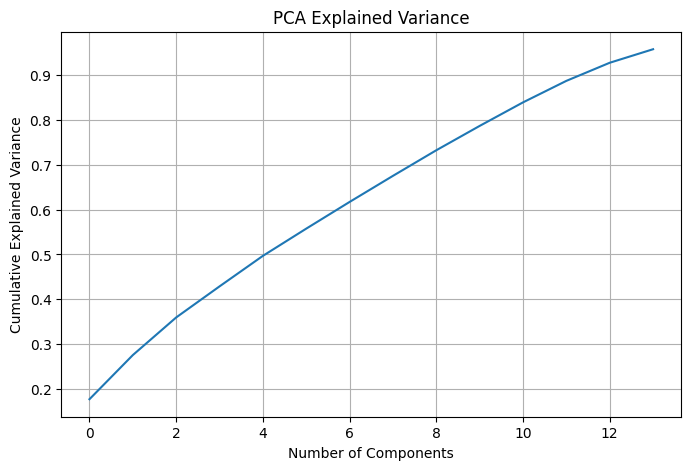


Train shape: (3927, 14), Test shape: (982, 14)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Separate features and target
X = df.drop(columns=['stroke'])
y = df['stroke']

# Convert categorical columns to numeric (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# ✅ Drop rows with missing values
X_encoded = X_encoded.dropna()
y = y.loc[X_encoded.index]

# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"\nPCA components: {X_pca.shape[1]} (explained variance ratio: {pca.explained_variance_ratio_.sum():.4f})")

# Create final DataFrame
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['stroke'] = y.values

print("\nFinal PCA dataset shape:", df_pca.shape)
print("\nFirst few rows:")
print(df_pca.head())

# Visualize PCA variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# Split for training
X_final, y_final = df_pca.drop(columns=['stroke']), df_pca['stroke']
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)
print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")